In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import pandas as pd
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Data Processing 
import os
import os.path
import random
import PIL
import glob
from PIL import Image # to read images

Use Keras Model Architecture

In [3]:
#For Keras model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l1
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Dataset Preparation

In [56]:
initial_data_path = "/content/drive/My Drive/data/"
initial_data_csv_path = "/content/drive/My Drive/InitialData.csv"

In [57]:
df = pd.read_csv(initial_data_csv_path)
df = df.drop(['x_min','x_max','y_min','y_max'], axis=1)
df.head()    

,filename,category
0,batch_1/000010.jpg,Clear plastic bottle
1,batch_1/000001.jpg,Clear plastic bottle
2,batch_1/000005.jpg,Clear plastic bottle
3,batch_1/000048.jpg,Clear plastic bottle
4,batch_1/000000.jpg,Clear plastic bottle


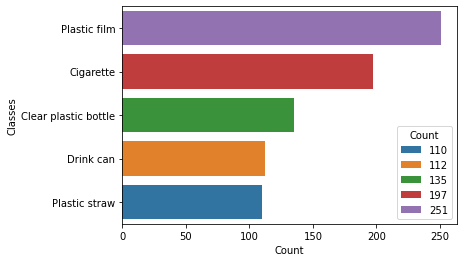

In [58]:
#Data Before Augmentation
axdf = pd.DataFrame(columns=['Classes', 'Count'])
axdf['Count'] = list(df['category'].value_counts())
axdf['Classes'] = df['category'].value_counts().index.values
axdf
sns.barplot(x = 'Count',y = 'Classes', data = axdf ,hue= axdf['Count'],dodge=False)

Create array data for model training

In [59]:
train_data = []  
for ind in df.index:
    img=Image.open(os.path.join(initial_data_path + df['filename'][ind]))
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = image.img_to_array(img)
    # Append image
    train_data.append(img)

In [60]:
# Create data arrays
X = np.array(train_data)
# Create dummy variables
df = pd.get_dummies(df, columns=["category"])
y = np.array(df.drop(['filename'],axis=1))
print(X.shape)
print(y.shape)
# Data split Randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

(805, 128, 128, 3)
(805, 5)


Build Keras Model on original data

In [61]:
def create_model():
  model = Sequential()
  model.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(5, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [62]:
model = create_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
dropout_61 (Dropout)         (None, 126, 126, 16)      0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 126, 126, 16)      64        
_________________________________________________________________
dropout_62 (Dropout)         (None, 126, 126, 16)      0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 254016)            0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 254016)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)               

In [63]:
# Early Stopping Parameters
early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

In [64]:
# Model fit
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.20, callbacks = [early_stopper])

Epoch 1/100
11/11 [==============================] - 1s 66ms/step - loss: 9.7655 - accuracy: 0.2136 - val_loss: 260.5747 - val_accuracy: 0.1008
Epoch 2/100
11/11 [==============================] - 0s 43ms/step - loss: 8.5974 - accuracy: 0.3631 - val_loss: 96.9366 - val_accuracy: 0.1008
Epoch 3/100
11/11 [==============================] - 0s 41ms/step - loss: 6.4069 - accuracy: 0.4311 - val_loss: 20.1351 - val_accuracy: 0.1550
Epoch 4/100
11/11 [==============================] - 0s 41ms/step - loss: 3.6727 - accuracy: 0.5301 - val_loss: 4.1036 - val_accuracy: 0.3566
Epoch 5/100
11/11 [==============================] - 0s 40ms/step - loss: 3.1823 - accuracy: 0.5961 - val_loss: 3.7620 - val_accuracy: 0.3101
Epoch 6/100
11/11 [==============================] - 0s 41ms/step - loss: 2.4283 - accuracy: 0.6039 - val_loss: 3.7512 - val_accuracy: 0.3178
Epoch 7/100
11/11 [==============================] - 0s 41ms/step - loss: 1.5248 - accuracy: 0.7398 - val_loss: 4.0886 - val_accuracy: 0.3488
Ep

In [66]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

6/6 [==============================] - 0s 12ms/step - loss: 10.7507 - accuracy: 0.2050
Train: 0.834, Test: 0.205


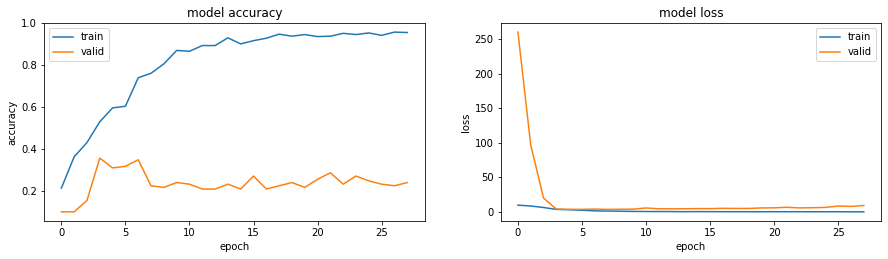

In [67]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [68]:
model_cv = KerasClassifier(build_fn=create_model, epochs=100, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model_cv,X_train, y_train,cv=kfold,verbose=10, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.3min finished


In [70]:
print(results)
print()

[0.26153848 0.24615385 0.21538462 0.23076923 0.328125   0.3125
 0.296875   0.34375    0.265625   0.296875  ]



Noticed above that for every fold results are vary a lot from 21% to 34%. Now lets train the model on augmented data

## **Keras Model on Augmented Data**

In [71]:
data_path = "/content/drive/My Drive/trainDataTACO/"
csv_path = "/content/drive/My Drive/FinalData.csv"

In [79]:
data = pd.read_csv(csv_path)

Generate array on Augmented data

In [74]:
train_data = []  
newsize = (128, 128)
for ind in data.index:
    img=Image.open(os.path.join( data_path + data['filename'][ind]))
    img = img.resize(newsize,Image.ANTIALIAS)
    img = image.img_to_array(img)
    # Append image
    train_data.append(img)

In [78]:
# Trining Array
X_data = np.array(train_data)

In [80]:
# Drop file names and create Labels array
data = pd.get_dummies(data, columns=["category"])

In [81]:
Y_labels = np.array(data.drop(['filename'],axis=1))
# Data split Randomly
x_train, x_test, Y_train, Y_test = train_test_split(X_data, Y_labels, random_state=42, test_size=0.1, stratify = Y_labels)
# Print Array shapes
print(x_train.shape)
print(Y_train.shape)

(2898, 128, 128, 3)
(2898, 5)


In [82]:
new_model = create_model()
new_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
dropout_64 (Dropout)         (None, 126, 126, 16)      0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 126, 126, 16)      64        
_________________________________________________________________
dropout_65 (Dropout)         (None, 126, 126, 16)      0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 254016)            0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 254016)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)               

In [84]:
# Model fit
history_final = new_model.fit(x_train, Y_train, epochs=100, batch_size=50, validation_split=0.20, callbacks = [early_stopper])

Epoch 1/100
47/47 [==============================] - 2s 48ms/step - loss: 1.9984 - accuracy: 0.8063 - val_loss: 3.2128 - val_accuracy: 0.6448
Epoch 2/100
47/47 [==============================] - 2s 45ms/step - loss: 1.6592 - accuracy: 0.8236 - val_loss: 3.2171 - val_accuracy: 0.6770
Epoch 3/100
47/47 [==============================] - 2s 45ms/step - loss: 1.3067 - accuracy: 0.8348 - val_loss: 3.0052 - val_accuracy: 0.6977
Epoch 4/100
47/47 [==============================] - 2s 45ms/step - loss: 1.3647 - accuracy: 0.8512 - val_loss: 3.2319 - val_accuracy: 0.7299
Epoch 5/100
47/47 [==============================] - 2s 45ms/step - loss: 1.0281 - accuracy: 0.8667 - val_loss: 3.1886 - val_accuracy: 0.7138
Epoch 6/100
47/47 [==============================] - 2s 45ms/step - loss: 1.0195 - accuracy: 0.8684 - val_loss: 3.7132 - val_accuracy: 0.7115
Epoch 7/100
47/47 [==============================] - 2s 45ms/step - loss: 1.0510 - accuracy: 0.8710 - val_loss: 2.9163 - val_accuracy: 0.7195
Epoch 

In [85]:
# evaluate the model
_, train_acc = new_model.evaluate(x_train, Y_train)
_, test_acc = new_model.evaluate(x_test, Y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

11/11 [==============================] - 0s 8ms/step - loss: 5.4777 - accuracy: 0.6646
Train: 0.908, Test: 0.665


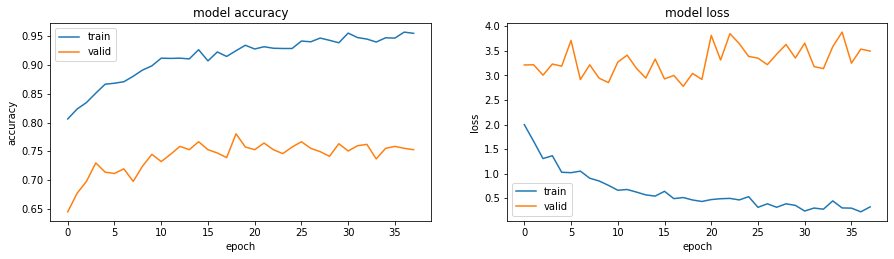

In [86]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history_final.history['accuracy'])  
plt.plot(history_final.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history_final.history['loss'])  
plt.plot(history_final.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

**Use K-Fold technique to see overfitting of newly created Model**

In [87]:
model_cv = KerasClassifier(build_fn=create_model, epochs=50, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results1 = cross_val_score(model_cv,x_train, Y_train,cv=kfold,verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.666, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] .................................... , score=0.641, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[CV] .................................... , score=0.662, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.0min remaining:    0.0s


[CV] .................................... , score=0.672, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.6min remaining:    0.0s


[CV] .................................... , score=0.628, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.2min remaining:    0.0s


[CV] .................................... , score=0.645, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.9min remaining:    0.0s


[CV] .................................... , score=0.666, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.5min remaining:    0.0s


[CV] .................................... , score=0.600, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 13.2min remaining:    0.0s


[CV] .................................... , score=0.675, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.8min remaining:    0.0s


[CV] .................................... , score=0.668, total= 1.7min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.5min finished


In [88]:
print(results1)
print()
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

[0.66551727 0.6413793  0.66206896 0.67241377 0.62758619 0.6448276
 0.66551727 0.60000002 0.67474049 0.6678201 ]

Baseline: 65.22% (2.26%)


Model Prediction

In [89]:
predictions = new_model.predict(x=x_test, steps=len(x_test), verbose=0)
classes = np.array(df.columns[1:])

In [91]:
all_5 = np.argsort(predictions[0])
for i in range(5):
    print("{}".format(classes[all_5[i]])+" ({:.3})".format(predictions[0][all_5[i]]))

category_Clear plastic bottle (2.45e-14)
category_Drink can (4.6e-12)
category_Cigarette (8.23e-09)
category_Plastic film (4.43e-06)
category_Plastic straw (1.0)
